SUPERSTORE SALES ANALYSIS

Which are the most selling products?

Which are the Top 10 products by sales?

Which are the most profitable products?

What category sold the most?

Which are the most profitable category?

Total sales values by category and subcategory

Which are the most selling products in subcategory?

Which customer segments are the most profitable ?

What shipping modes sold the most products?

Visualize the 'Category' column from the Shipmode column dataset standpoints.

What market sold the most products?

Which are the Top 10 country by sales?

Which are the average shipping cost for top 10 different countries?

Who are the top-10 most profitable customers?

Total sales values by year and month.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df= pd.read_excel("E:\\AI-ML-DS_Projects\\DOCS-PYNB-Files\\DS-Projects\\Product Sales Data Analysis\\superstore_sales.xlsx")

To check first "n" rows of the dataset

In [3]:
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


**Data Manipulation**

**1) To check the number of rows and columns**


In [4]:
df.shape

(51290, 21)

**2) To count the number of missing values in the dataset.**

In [5]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

1) Which are the most selling products?

In [6]:
# first we did the groupby of the product name and aggregated the values in a new column "quantity", later we sorted the value in decending order. 
# And printed the first/Top 10 rows. [:10] 

most_sold_Products= df.groupby('product_name').agg({'quantity' : 'sum'}).sort_values('quantity', ascending= False)[:10]
most_sold_Products

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


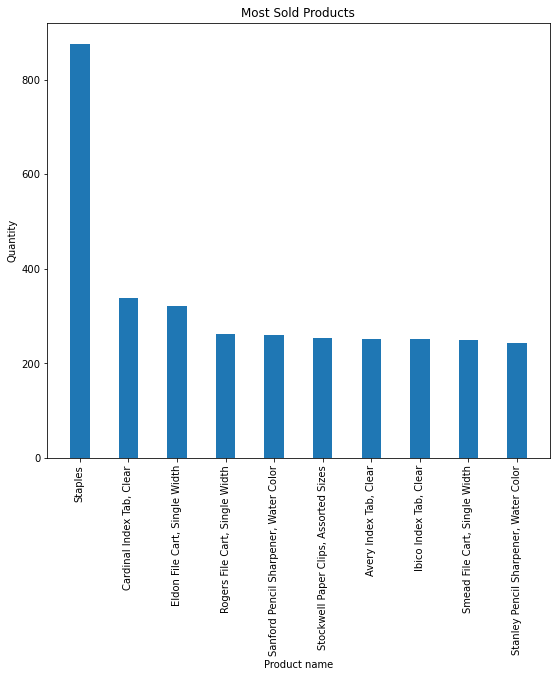

In [7]:
#Seaborn code
#sns.barplot(x= 'product_name', y= 'quantity', data= most_sold_Products.reset_index())
#plt.xticks(rotation= 'vertical')

# Matplotlib code
plt.figure(figsize=(9,8))
plt.bar('product_name','quantity', data= most_sold_Products.reset_index(), width= 0.4)
plt.xticks(rotation= 'vertical')
plt.xlabel('Product name')
plt.ylabel('Quantity')
plt.title('Most Sold Products')
plt.show()

Which are the Top 10 products by sales?

In [8]:
top_product_sales= pd.DataFrame(df.groupby('product_name').sum()['sales'])
top_product_sales.sort_values(by=['sales'], inplace= True, ascending= False)
top_product_sales.head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


Which are the most profitable products?

In [9]:
Most_profitable_product= pd.DataFrame(df.groupby('product_name').sum()['profit'])
Most_profitable_product.sort_values(by=['profit'], inplace= True, ascending= False)
Most_profitable_product.head(10)

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


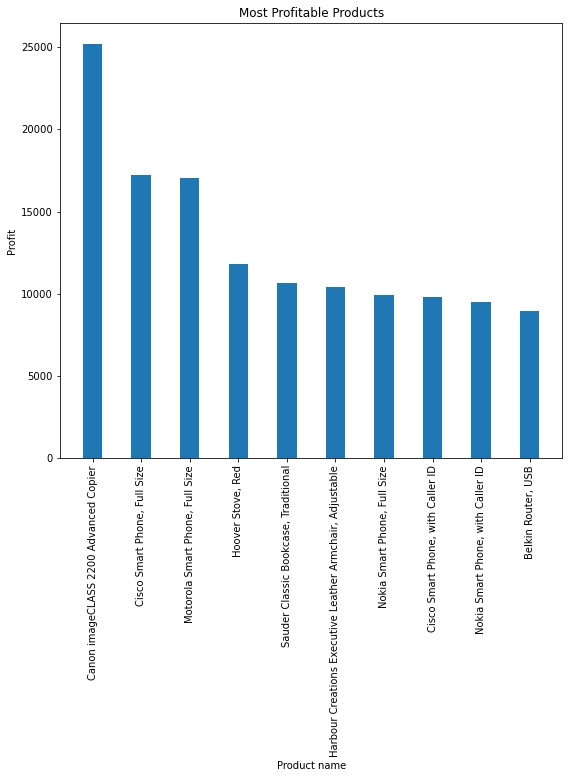

In [10]:
plt.figure(figsize=(9,8))
plt.bar('product_name','profit', data= Most_profitable_product.head(10).reset_index(), width= 0.4)
plt.xlabel('Product name')
plt.xticks(rotation= 'vertical')
plt.ylabel('Profit')
plt.title('Most Profitable Products')
plt.show()

What category sold the most?

In [11]:
Sold_the_most= df.groupby(['category', 'sales']).sum()
Sold_the_most

quantity  discount     profit  shipping_cost  year
category   sales                                                        
Furniture  1.892             1       0.6    -0.9933        0.18000  2014
           1.988             1       0.6    -1.4413        0.17000  2014
           2.032             1       0.6    -1.3208        0.10000  2014
           2.328             4       1.2    -1.5132        0.38000  4026
           2.784             2       0.2     0.4176        0.14000  2014
...                        ...       ...        ...            ...   ...
Technology 10499.970         3       0.0  5039.9856      363.19000  2014
           11199.968         4       0.2  3919.9888       45.98000  2014
           13999.960         4       0.0  6719.9808       20.00054  2014
           17499.950         5       0.0  8399.9760      349.07000  2013
           22638.480         6       0.5 -1811.0784       24.28650  2011

[29131 rows x 5 columns]

Which are the most profitable category?

In [12]:
Most_Profitable_Category= pd.DataFrame(df.groupby('category').sum()['profit'])
Most_Profitable_Category.sort_values(by=['profit'], inplace=False, ascending= False)
Most_Profitable_Category

,profit
category,
Furniture,286782.25380
Office Supplies,518473.83430
Technology,663778.73318


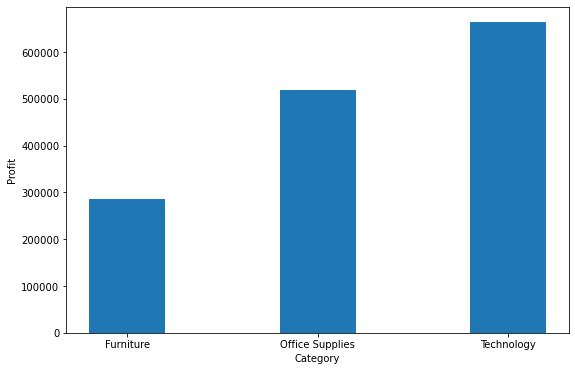

In [13]:
plt.figure(figsize=(9,6))
plt.bar('category', 'profit', data= Most_Profitable_Category.reset_index(), width=0.4)
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()


Total sales values by category and subcategory?

In [14]:
df.groupby(['category', 'sub_category']).sum()

sales  quantity  discount        profit  \
category        sub_category                                                   
Furniture       Bookcases     1.466572e+06      8310   370.710  161924.41950   
                Chairs        1.501682e+06     12336   560.120  141973.79750   
                Furnishings   3.855783e+05     11225   478.880   46967.42550   
                Tables        7.570419e+05      3083   250.320  -64083.38870   
Office Supplies Appliances    1.011064e+06      6078   248.700  141680.58940   
                Art           3.720920e+05     16301   573.080   57953.91090   
                Binders       4.619115e+05     21429  1102.480   72449.84600   
                Envelopes     1.709043e+05      8380   320.810   29601.11630   
                Fasteners     8.324232e+04      8390   340.240   11525.42410   
                Labels        7.340403e+04      9322   313.890   15010.51200   
                Paper         2.442917e+05     12822   387.300   59207.68270   
                Storage       1.127086e+06     16917   700.490  108461.48980   
                Supplies      2.430742e+05      8543   310.200   22583.26310   
Technology      Accessories   7.492370e+05     10946   370.480  129626.30620   
                Copiers       1.509436e+06      7454   260.418  258567.54818   
                Machines      7.790601e+05      4906   252.000   58867.87300   
                Phones        1.706824e+06     11870   489.610  216717.00580   

                              shipping_cost      year  
category        sub_category                           
Furniture       Bookcases       155481.9670   4852847  
                Chairs          164229.3520   6911889  
                Furnishings      40746.7660   6380451  
                Tables           79861.3940   1732979  
Office Supplies Appliances      108300.5860   3532371  
                Art              41287.1420   9828413  
                Binders          48181.7120  12382700  
                Envelopes        18547.4880   4901146  
                Fasteners         9053.3380   4870955  
                Labels            8059.6750   5245285  
                Paper            26660.8450   7121179  
                Storage         120546.0320  10182612  
                Supplies         24811.5270   4881018  
Technology      Accessories      83513.3340   6189269  
                Copiers         159496.2049   4474471  
                Machines         79135.8485   2990958  
                Phones          184902.4920   6756800

Which are the most selling products in subcategory?

In [15]:
Most_sold_Products_subcategory= df.groupby(['category', 'sub_category'], as_index= False)['quantity'].count()
Most_sold_Products_subcategory

,category,sub_category,quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


Which customer segments are the most profitable ?

In [16]:
profitable_Segments= pd.DataFrame(df.groupby(['segment']).sum()['profit'])
profitable_Segments.sort_values(by=['profit'], inplace= False, ascending=False)
profitable_Segments

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


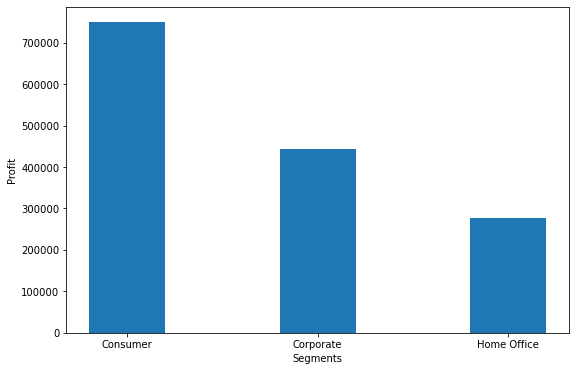

In [17]:
plt.figure(figsize=(9,6))
plt.bar('segment', 'profit', data=profitable_Segments.reset_index(), width=0.4)
plt.xlabel('Segments')
plt.ylabel('Profit')
plt.show()

What shipping modes sold the most products?

In [18]:
ship_mode_most_sold = pd.DataFrame(df.groupby(['ship_mode']).sum()['sales'])
ship_mode_most_sold.sort_values(by=['sales'], inplace= False, ascending= False)
ship_mode_most_sold

,sales
ship_mode,
First Class,1.830976e+06
Same Day,6.672020e+05
Second Class,2.565672e+06
Standard Class,7.578652e+06


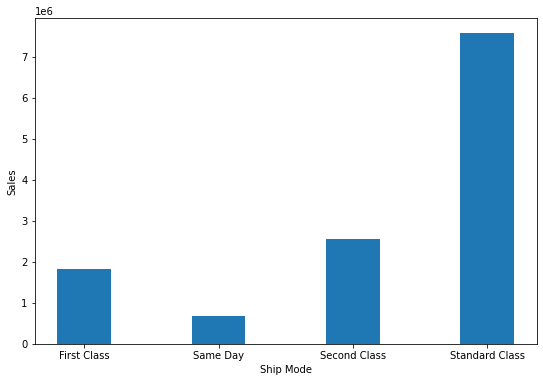

In [23]:
plt.figure(figsize=(9,6))
plt.bar('ship_mode', 'sales', data= ship_mode_most_sold.reset_index(), width=0.4)
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()

Visualize the 'Category' column from the Shipmode column dataset standpoints.

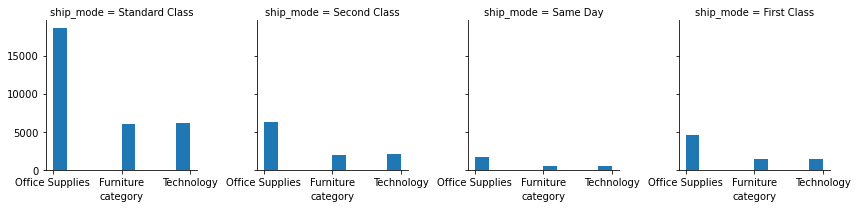

In [28]:
category_hist = sns.FacetGrid(df, col='ship_mode', palette='rainbow')
category_hist.map(plt.hist, 'category')